## Introduction to Jupyter Notebooks
Notebook Checkpoints: Not an alternative to version control, do not rely on the OnDemand app to autosave for you.

JupyterLab notebooks support Markdown cells, code cells, and raw cells. 
* Raw cells are completely unformatted content that have no specified run behavior.
* Code cells support Python by default, but they can be enabled to suppport Bash, R, or even Julia.
* Markdown cells use Markdown formatting. If you would like to use Markdown formatting, I [recommend the following Markdown guide](https://docs.github.com/en/get-started/writing-on-github/getting-started-with-writing-and-formatting-on-github/basic-writing-and-formatting-syntax) from GitHub.

The language in code cells depends on which **kernel** is selected. By default, you will have a Python3 kernel. Look in the top right corner to see which kernel you're running.

Jupyter has the most robust support for its Python kernels, as it was originally designed for that programming language.

In [1]:
x = 3

In [2]:
myname = "jolinda"

By default, IPython will evaluate the statement (or variable) at the last line of a code block.

In [3]:
myname

'jolinda'

We can define our own functions in one cell and reuse them in other cells.

In [4]:
def hello(name):
    return "hello" + name

In [5]:
hello(myname)

'hellojolinda'

IPython keeps a running list or cache of every command that was run in a particular kernel session.

In [6]:
In

['',
 'x = 3',
 'myname = "jolinda"',
 'myname',
 'def hello(name):\n    return "hello" + name',
 'hello(myname)',
 'In']

`In`is a **list** of commands.

In [7]:
Out

{3: 'jolinda',
 5: 'hellojolinda',
 6: ['',
  'x = 3',
  'myname = "jolinda"',
  'myname',
  'def hello(name):\n    return "hello" + name',
  'hello(myname)',
  'In',
  'Out']}

`Out` is a **dictionary** of `{command number:return value} pairs.

To use JupyterLab as a notebook, you want to avoid running cells in an arbitrary order. Make sure your final notebook reproduces your results if the cells are run in their defined order.

Jupyter supports **cell magics**, which allow you to integrate Bash commands into your Python workflow. We will discuss Bash magics in more detail, but you can see a full list of support magics using the `%magic` command.

%magic -brief

In [11]:
%%bash 
ls

customizing_ipython.ipynb
greta.png
hello.py
hello.sbatch
jupyter.yml
live-notebook.ipynb
movement.csv
notebook_as_labbook.ipynb
notebook_as_labbook.md


This command turns off automagics for this kernel session only.

In [12]:
%automagic off


Automagic is OFF, % prefix IS needed for line magics.


`?` can be prepended to any command to get the docstring. The `??`

In [13]:
print?

Signature: print(*args, sep=' ', end='\n', file=None, flush=False)
Docstring:
Prints the values to a stream, or to sys.stdout by default.

sep
  string inserted between values, default a space.
end
  string appended after the last value, default a newline.
file
  a file-like object (stream); defaults to the current sys.stdout.
flush
  whether to forcibly flush the stream.
Type:      builtin_function_or_method

In [14]:
myname?

Type:        str
String form: jolinda
Length:      7
Docstring:  
str(object='') -> str
str(bytes_or_buffer[, encoding[, errors]]) -> str

Create a new string object from the given object. If encoding or
errors is specified, then the object must expose a data buffer
that will be decoded using the given encoding and error handler.
Otherwise, returns the result of object.__str__() (if defined)
or repr(object).
encoding defaults to 'utf-8'.
errors defaults to 'strict'.

Because the JupyterLab application is running on a Talapas compute node, you have access to the underlying network filesystem through Bash commands.

In [16]:
!ls

customizing_ipython.ipynb  hello.sbatch		movement.csv
greta.png		   jupyter.yml		notebook_as_labbook.ipynb
hello.py		   live-notebook.ipynb	notebook_as_labbook.md


In [19]:
bookdir = '/projects/racs_training/intro-hpc-s25/slurm/part2/books/'

In [20]:
!ls {bookdir}

alice_in_wonderland.txt		moby_dick.txt		 romeo_and_juliet.txt
complete_works_shakespeare.txt	pride_and_prejudice.txt


Notice that because line magics are launched as subprocesses, changes made there don't migrate over from cell to cell.

In [21]:
%cd {bookdir}

/gpfs/projects/racs_training/intro-hpc-s25/slurm/part2/books


Use the `%pwd` command to check the working directory of your JupyterLab kernel session. This is an important debugging tool for making sure filepaths are relative to where you intend.

In [22]:
%pwd

'/gpfs/projects/racs_training/intro-hpc-s25/slurm/part2/books'

To run a longer sequence of commands, run a cell magic, which applies to an entire cell.

In [23]:
%%bash
pwd
ls -l

/gpfs/projects/racs_training/intro-hpc-s25/slurm/part2/books
total 7864
-rw-r--r--. 1 bedelman is.racs.pirg.racs_training  174357 May 19 13:20 alice_in_wonderland.txt
-rw-r--r--. 1 bedelman is.racs.pirg.racs_training 5638516 May 19 13:20 complete_works_shakespeare.txt
-rw-r--r--. 1 bedelman is.racs.pirg.racs_training 1276288 May 19 13:20 moby_dick.txt
-rw-r--r--. 1 bedelman is.racs.pirg.racs_training  772419 May 19 13:20 pride_and_prejudice.txt
-rw-r--r--. 1 bedelman is.racs.pirg.racs_training  169541 May 19 13:20 romeo_and_juliet.txt


How do we do the reverse? That is, how do we get the outputs of cell magic commands as variables within our Jupyter notebooks.

In [24]:
booklist = !ls {bookdir}

In [25]:
booklist

['alice_in_wonderland.txt',
 'complete_works_shakespeare.txt',
 'moby_dick.txt',
 'pride_and_prejudice.txt',
 'romeo_and_juliet.txt']

This *looks* like a normal Python list, but this is actually an SList object supported by IPython.

In [26]:
booklist?

Type:        SList
String form: ['alice_in_wonderland.txt', 'complete_works_shakespeare.txt', 'moby_dick.txt', 'pride_and_prejudice.txt', 'romeo_and_juliet.txt']
Length:      5
File:        ~/.conda/envs/jupyter-racs-s25/lib/python3.13/site-packages/IPython/utils/text.py
Docstring:  
List derivative with a special access attributes.

These are normal lists, but with the special attributes:

* .l (or .list) : value as list (the list itself).
* .n (or .nlstr): value as a string, joined on newlines.
* .s (or .spstr): value as a string, joined on spaces.
* .p (or .paths): list of path objects (requires path.py package)

Any values which require transformations are computed only once and
cached.

In [27]:
booklist.s

'alice_in_wonderland.txt complete_works_shakespeare.txt moby_dick.txt pride_and_prejudice.txt romeo_and_juliet.txt'

In [28]:
booklist.n

'alice_in_wonderland.txt\ncomplete_works_shakespeare.txt\nmoby_dick.txt\npride_and_prejudice.txt\nromeo_and_juliet.txt'

In [32]:
%%bash --no-raise-error
module purge
module load fsl/6.0.7.9
bet2 -h

sh: module-logger: command not found
sh: module-logger: command not found

Part of FSL (ID: "")
BET (Brain Extraction Tool) v2.1 - FMRIB Analysis Group, Oxford

Usage: 
bet2 <input_fileroot> <output_fileroot> [options]

Optional arguments (You may optionally specify one or more of):
	-o,--outline	generate brain surface outline overlaid onto original image
	-m,--mask	generate binary brain mask
	-s,--skull	generate approximate skull image
	-n,--nooutput	don't generate segmented brain image output
	-f <f>		fractional intensity threshold (0->1); default=0.5; smaller values give larger brain outline estimates
	-g <g>		vertical gradient in fractional intensity threshold (-1->1); default=0; positive values give larger brain outline at bottom, smaller at top
	-r,--radius <r>	head radius (mm not voxels); initial surface sphere is set to half of this
	-w,--smooth <r>	smoothness factor; default=1; values smaller than 1 produce more detailed brain surface, values larger than one produce smoother, 

In [31]:
!hostname

n0209.talapas.uoregon.edu


In [33]:
%%bash?

Docstring:
%%bash script magic

Run cells with bash in a subprocess.

This is a shortcut for `%%script bash`
File:      ~/.conda/envs/jupyter-racs-s25/lib/python3.13/site-packages/IPython/core/magics/script.py

In [2]:
%system ls

['customizing_ipython.ipynb',
 'greta.png',
 'hello.py',
 'hello.sbatch',
 'hello_world_python-34921759.err',
 'hello_world_python-34921759.out',
 'hello_world_python-34921812.err',
 'hello_world_python-34921812.out',
 'ipython_log.py',
 'jupyter.yml',
 'live-notebook.ipynb',
 'movement.csv',
 'notebook_as_labbook.ipynb',
 'notebook_as_labbook.md']

In [37]:
%cd ~/jupyter

/gpfs/home/emwin/jupyter


In [38]:
%system ls

['customizing_ipython.ipynb',
 'greta.png',
 'hello.py',
 'hello.sbatch',
 'jupyter.yml',
 'live-notebook.ipynb',
 'movement.csv',
 'notebook_as_labbook.ipynb',
 'notebook_as_labbook.md']

In [42]:
%%system
cd {bookdir}
ls

['alice_in_wonderland.txt',
 'complete_works_shakespeare.txt',
 'moby_dick.txt',
 'pride_and_prejudice.txt',
 'romeo_and_juliet.txt']

In [40]:
booklist = _

In [41]:
_

['alice_in_wonderland.txt',
 'complete_works_shakespeare.txt',
 'moby_dick.txt',
 'pride_and_prejudice.txt',
 'romeo_and_juliet.txt']

IPython has an auto-logging feature that logs every command execute in a given notebook. 

In [44]:
%logstart -o -t live_notebook.log append

/home/emwin/.conda/envs/jupyter-racs-s25/lib/python3.13/site-packages/IPython/core/magics/logging.py:130: UserWarning: Couldn't start log: Log file is already active: ipython_log.py
  warn("Couldn't start log: %s" % sys.exc_info()[1])


The `append` flag is important because it makes sure your current session's log doesn't overwrite any previous sessions with the notebook.

In [45]:
round(234.234)

234

In [46]:
%pwd

'/gpfs/home/emwin/jupyter'

In [48]:
%ls

customizing_ipython.ipynb  ipython_log.py       notebook_as_labbook.ipynb
greta.png                  jupyter.yml          notebook_as_labbook.md
hello.py*                  live-notebook.ipynb
hello.sbatch*              movement.csv


In [49]:
$ls?

Repr: <alias ls for 'ls -F --color'>

We can also run Slurm scripts from within Jupyter notebooks.

The file `hello.py` has an error that can be corrected by changing what value is looked up in the dictionary.

In [51]:
%run hello.py

KeyError: 'b'

In [53]:
%more hello.py

dictionary = {'a': 1}
print(dictionary['b']) # Should Raise KeyError !!!
print("Hello Wold !!")


In [55]:
%%writefile hello.py
dictionary = {'a': 1}
print(dictionary['a']) # Should not Raise KeyError
print("Hello World !!")


Overwriting hello.py


In [56]:
%more hello.py

dictionary = {'a': 1}
print(dictionary['a']) # Should not Raise KeyError
print("Hello World !!")


Because the JupyterLab app is hosted on a Talapas interactive (compute) node, it is possible to queue Slurm jobs from inside notebooks using Bash line and cell magics.

In [57]:
%run hello.py

1
Hello World !!


In [61]:
!sbatch hello.sbatch

Submitted batch job 34921759


In [62]:
jobno = !sbatch --parsable hello.sbatch

In [65]:
jobno.s

'34921812'

In [66]:
!sacct -j {jobno.s}

JobID           JobName  Partition    Account  AllocCPUS      State ExitCode 
------------ ---------- ---------- ---------- ---------- ---------- -------- 
34921812     hello_wor+    compute racs_trai+          1  COMPLETED      0:0 
34921812.ba+      batch            racs_trai+          1  COMPLETED      0:0 
34921812.ex+     extern            racs_trai+          1  COMPLETED      0:0 


In [69]:
!sacct -j {jobno.s} -B

Batch Script for 34921812
--------------------------------------------------------------------------------
#!/bin/bash

#SBATCH --partition=compute              ### Partition (like a queue in PBS)
#SBATCH --account=racs_training          ### Account used for job submission

### NOTE: %u=userID, %x=jobName, %N=nodeID, %j=jobID, %A=arrayMain, %a=arraySub
#SBATCH --job-name=hello_world_python    ### Job Name
#SBATCH --output=%x-%j.out               ### File in which to store job output
#SBATCH --error=%x-%j.err                ### File in which to store job error messages

#SBATCH --time=0-00:05:00                ### Wall clock time limit in Days-HH:MM:SS
#SBATCH --nodes=1                        ### Number of nodes needed for the job
#SBATCH --mem=500M                       ### Total Memory for job in MB -- can do K/M/G/T for KB/MB/GB/TB
#SBATCH --ntasks-per-node=1              ### Number of tasks to be launched per Node
#SBATCH --cpus-per-task=1                ### Number of cpus/cores to 

You can recover the batch script with `-B` flag if and only you launched the original job. You cannot see the batch script for other peoples' jobs.

Pictures in Jupyter Notebooks

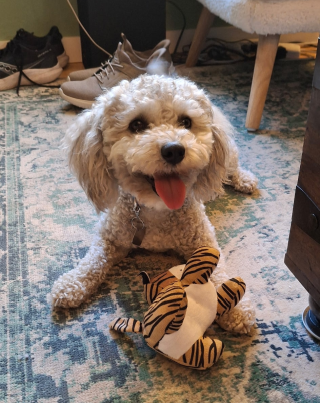

Let's practice plotting visualization in Jupyter notebooks. We will need Pandas (a tabular data manipulation library) and MatplotLib (a popular data visualization library).

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

In [8]:
our_data = pd.read_csv("movement.csv")

In [74]:
our_data


,trans_x,trans_y,trans_z
0,0.008194,-0.083524,-0.158871
1,-0.002647,-0.073538,-0.175832
2,0.014109,-0.088078,-0.143366
3,0.002378,-0.053224,-0.198539
4,0.011088,-0.095579,-0.149649
...,...,...,...
183,-0.079590,0.141959,0.096598
184,-0.059636,0.054377,-0.365887
185,-0.059885,0.165888,-0.418908
186,-0.059803,0.105054,-0.347754


In [79]:
our_data.iloc[20:25, :]

,trans_x,trans_y,trans_z
20,0.014979,0.019776,0.011740
21,0.029701,-0.040776,0.053122
22,0.011854,0.037521,0.003869
23,0.025833,-0.056966,0.045898
24,0.008634,0.034495,-0.011539


Use the `%who` cell magic to list active variables in a given Jupyter session.

In [81]:
# These are my variables
%who

bookdir	 booklist	 dictionary	 hello	 jobno	 myname	 our_data	 pd	 plt	 
x	 


Let's start with a simple plot with lines representing `trans_x`, `trans_y`, and `trans_z`.

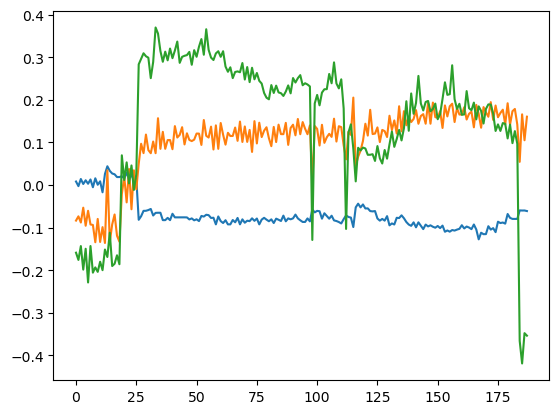

In [87]:
plt.plot(our_data)

To add interactive components like sliders to your notebook (these will *not* appear into HTML versions), use the **ipywidgets** module.

In [2]:
import ipywidgets

In [3]:
ipywidgets.widgets.IntRangeSlider()

IntRangeSlider(value=(25, 75))

In [9]:
def myplot(xmax):
    plt.plot(our_data)
    plt.xlim(0,xmax)
    plt.show()

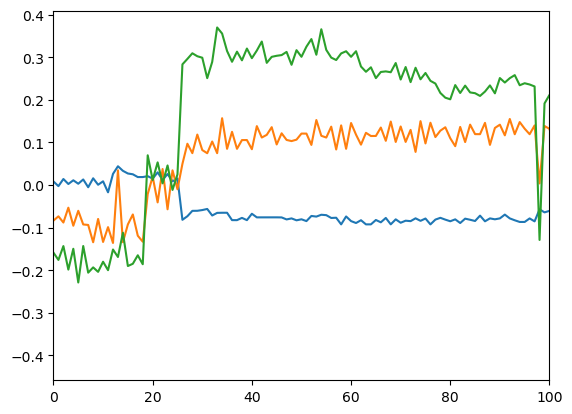

In [10]:
myplot(100)

In [11]:
ipywidgets.interactive(myplot, xmax=180)

interactive(children=(IntSlider(value=180, description='xmax', max=540, min=-180), Output()), _dom_classes=('w…